In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

output_file = "output_data\population"


In [2]:
# Read in data files for population data
total_pop = "Resources/population.csv"
west_pop = "Resources/westcoastpop.csv"
east_pop = "Resources/eastcoastpop.csv"

total_pop = pd.read_csv(total_pop) 
west_pop = pd.read_csv(west_pop)
east_pop = pd.read_csv(east_pop)

total_pop.index=['2014','2015','2016','2017','2018']
new_pop=total_pop.drop(['Unnamed: 0'],axis=1)
new_pop['West Coast Population'] = new_pop['West Coast Population'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_pop['East Coast Population'] = new_pop['East Coast Population'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_pop

,West Coast Population,East Coast Population
2014,"51,990,562","142,194,048"
2015,"52,514,181","143,606,904"
2016,"51,860,147","144,608,014"
2017,"52,338,164","146,084,866"
2018,"52,685,584","146,728,065"


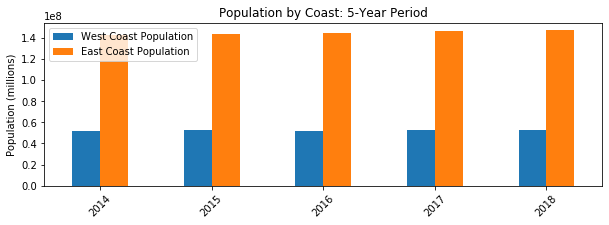

In [3]:
total_pop.drop(['Unnamed: 0'],axis=1).plot(kind="bar", figsize=(10,3), rot=45)
plt.title('Population by Coast: 5-Year Period')
plt.ylabel('Population (millions)')  
plt.show()

In [4]:
west_pop.index=['2014','2015','2016','2017','2018']
new_west=west_pop.drop(['Unnamed: 0'],axis=1)
new_west['Alaska'] = new_west['Alaska'].astype(int).apply(lambda x: "{:,}".format(x))   
new_west['California'] = new_west['California'].astype(int).apply(lambda x: "{:,}".format(x))   
new_west['Hawaii'] = new_west['Hawaii'].astype(int).apply(lambda x: "{:,}".format(x))   
new_west['Oregon'] = new_west['Oregon'].astype(int).apply(lambda x: "{:,}".format(x))   
new_west['Washington'] = new_west['Washington'].astype(int).apply(lambda x: "{:,}".format(x))   
new_west

,Alaska,California,Hawaii,Oregon,Washington
2014,"736,732","38,802,500","1,419,561","3,970,239","7,061,530"
2015,"738,432","39,144,818","1,431,603","4,028,977","7,170,351"
2016,"736,855","38,654,206","1,413,673","3,982,267","7,073,146"
2017,"738,565","38,982,847","1,421,658","4,025,127","7,169,967"
2018,"738,516","39,148,760","1,422,029","4,081,943","7,294,336"


In [5]:
east_pop.index=['2014','2015','2016','2017','2018']
new_east=east_pop.drop(['Unnamed: 0'],axis=1)
new_east['Alabama'] = new_east['Alabama'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_east['Connecticut'] = new_east['Connecticut'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_east['Delaware'] = new_east['Delaware'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_east['Florida'] = new_east['Florida'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_east['Georgia'] = new_east['Georgia'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_east['Louisiana'] = new_east['Louisiana'].astype(int).apply(lambda x: "{:,}".format(x)) 
new_east['Maine'] = new_east['Maine'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['Maryland'] = new_east['Maryland'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['Massachusetts'] = new_east['Massachusetts'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['Mississippi'] = new_east['Mississippi'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['New Hampshire'] = new_east['New Hampshire'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['New Jersey'] = new_east['New Jersey'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['New York'] = new_east['New York'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['North Carolina'] = new_east['North Carolina'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['Rhode Island'] = new_east['Rhode Island'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['South Carolina'] = new_east['South Carolina'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['Texas'] = new_east['Texas'].astype(int).apply(lambda x: "{:,}".format(x))
new_east['Virginia'] = new_east['Virginia'].astype(int).apply(lambda x: "{:,}".format(x))
new_east

,Alabama,Connecticut,Delaware,Florida,Georgia,Louisiana,Maine,Maryland,Massachusetts,Mississippi,New Hampshire,New Jersey,New York,North Carolina,Rhode Island,South Carolina,Texas,Virginia
2014,"4,849,377","3,596,677","935,614","19,893,297","10,097,343","4,649,676","1,330,089","5,976,407","6,745,408","2,994,079","1,326,813","8,938,175","19,746,227","9,943,964","1,055,173","4,832,482","26,956,958","8,326,289"
2015,"4,858,979","3,590,886","945,934","20,271,272","10,214,860","4,670,724","1,329,328","6,006,401","6,794,422","2,992,333","1,330,608","8,958,013","19,795,791","10,042,802","1,056,298","4,896,146","27,469,114","8,382,993"
2016,"4,863,300","3,576,452","952,065","20,612,439","10,310,371","4,681,666","1,331,479","6,016,447","6,811,779","2,988,726","1,334,795","8,944,469","19,745,289","10,146,788","1,056,426","4,961,119","27,862,596","8,411,808"
2017,"4,874,747","3,588,184","961,939","20,984,400","10,429,379","4,684,333","1,335,907","6,052,177","6,859,819","2,984,100","1,342,795","9,005,644","19,849,399","10,273,419","1,059,639","5,024,369","28,304,596","8,470,020"
2018,"4,887,871","3,572,665","967,171","21,299,325","10,519,475","4,659,978","1,338,404","6,042,718","6,902,149","2,986,530","1,356,458","8,908,520","19,542,209","10,383,620","1,057,315","5,084,127","28,701,845","8,517,685"


In [6]:
total_df=pd.DataFrame(new_pop)
west_df=pd.DataFrame(new_west)
east_df=pd.DataFrame(new_east)